# Multiple Linear Regression

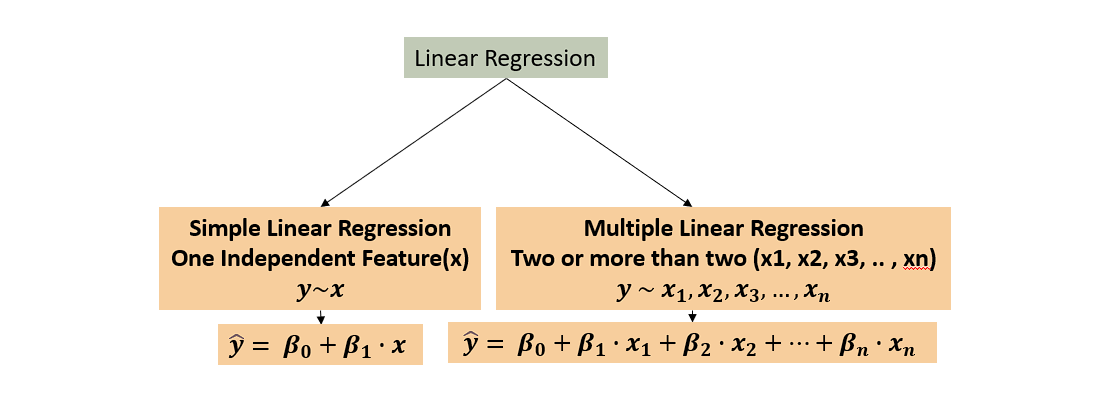

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1: Read the dataset

In [3]:
import pandas as pd
df = pd.read_csv('50_Startups (5).csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Step 2: Basic Data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Step 3 : Seperate X(RND, ADMIN, MKT) and Y(PROFIT)

PROFIT ~ RND, ADMIN, MKT

PROFIT_pred = B0 + B1xRND + B2xADMIN + B3xMKT

In [7]:
X = df[['RND', 'ADMIN', 'MKT']]
Y = df[['PROFIT']]

In [8]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Step 4: Build a Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [11]:
model.intercept_

array([50122.19298987])

In [12]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [13]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

# 
PROFIT_pred = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT

RND is having higest coefficient , Hence more i spend in RND more will be the profit

Step 5: Evaluate the model

In [14]:
# R2 score
model.score(X,Y)

0.9507459940683246

In [15]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [16]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [20]:
def evaluate_model(model, X, Y):
    ypred = model.predict(X)
    # Get all the metrics
    mse = mean_squared_error(Y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(Y, ypred)
    mape = mean_absolute_percentage_error(Y, ypred)
    r2 = r2_score(Y, ypred)
    # Print all above results
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE) : {rmse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Absolute Percentage Error (MAPE) : {mape*100:.2f} %')
    print(f'R2 score : {r2:.4f}')

In [21]:
evaluate_model(model,X,Y)

Mean Squared Error (MSE): 78417126.02
Root Mean Squared Error (RMSE) : 8855.34
Mean Absolute Error (MAE): 6471.45
Mean Absolute Percentage Error (MAPE) : 10.60 %
R2 score : 0.9507


# Because above model has r2 score of 0.9507 > 0.8 hence above is a very good model

Step 6: Out of Sample Prediction

In [23]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [24]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [25]:
rnd = 100000
admin = 40000
mkt = 35000
xnew = [[rnd, admin, mkt]]
pred = model.predict(xnew)[0][0]
print(f'The estimated Profit is : {pred:.2f}')

The estimated Profit is : 130574.04


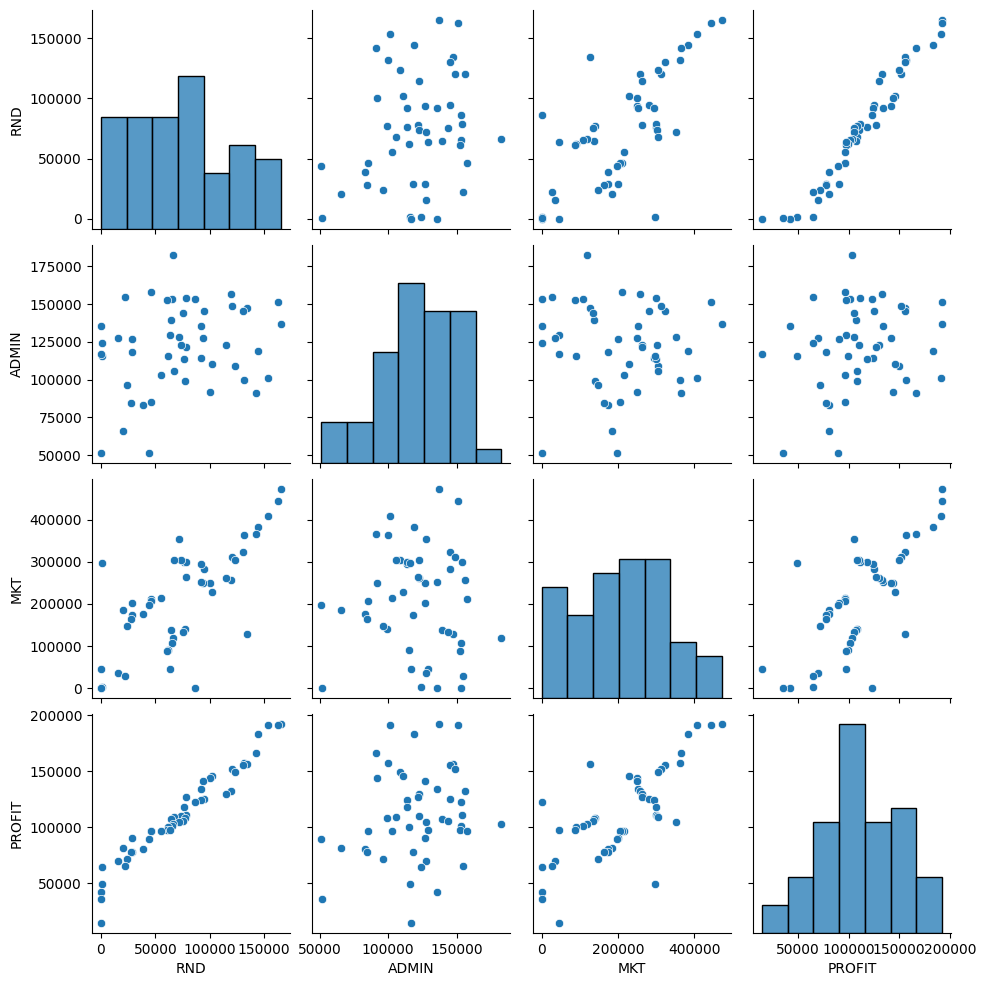

In [26]:
import seaborn as sns
sns.pairplot(df)